In [1]:
## Import packages
from qutip import *
from qutip.piqs import *
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
font_size = 10
font_family = 'serif'
# Set Font Parameters
font = {'family': font_family, 'size': font_size}
plt.rc('font', **font)

In [2]:
#TLS parameters
N = 6
cav_dim = 20
system = Dicke(N)
nds = num_dicke_states(N)
I_atm = to_super(qeye(nds))
I_phot = to_super(qeye(cav_dim))


[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jspin(N, "-")

a = destroy(cav_dim)

#total operators
jz_tot = tensor(qeye(cav_dim), jz)
jpjm_tot = tensor(qeye(cav_dim), jp*jm)
nphot_tot = tensor(a.dag()*a, qeye(nds))

wa = 1
wc = 1
gc = 1
g = 3
gE = 0.1
Ks = 0.01
gamma = 1

rho0 = dicke(N, N/2, N/2)
rho0_phot = ket2dm(basis(cav_dim, 0))
rho0_tot = tensor(rho0_phot, rho0)

In [3]:

HA = wa * jz
system.hamiltonian = HA 
HF = wc * a.dag() * a
HI = g * tensor(a + a.dag(), jx)

c_ops_phot = [np.sqrt(gamma) * a]
system.emission = gE 
system.dephasing = Ks

liouv = system.liouvillian() 
liouv_phot = liouvillian(HF, c_ops_phot)
liouv_sum = super_tensor(liouv_phot, I_atm) + super_tensor(I_phot, liouv)
liouv_int = -1j* spre(HI) + 1j* spost(HI)
liouv_tot = liouv_sum + liouv_int


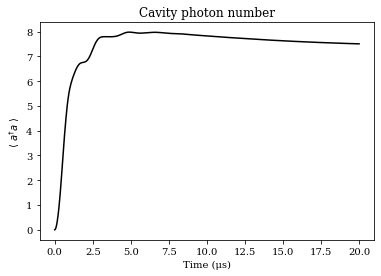

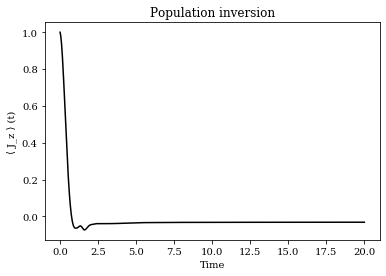

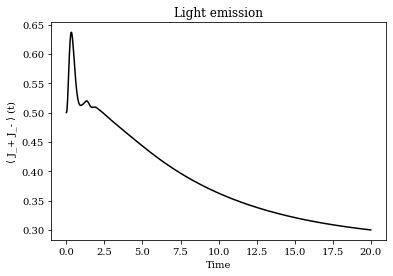

In [4]:
time = 20
steps = 1000
tlist = np.linspace(0, time, steps)
result = mesolve(liouv_tot, rho0_tot, tlist, [], e_ops = [jz_tot, jpjm_tot, nphot_tot], options=Options(nsteps=10000))

jzt_tot = result.expect[0]
jpjmt_tot = result.expect[1]
adagat_tot = result.expect[2]

jmax = (N/2)
j2max = N/2*(N/2+1)

plt.figure(1)
plt.plot(tlist, adagat_tot, 'k', label='time evolution')
#plt.plot(tlist, nphot_ss, 'g--', label='steady state')
plt.title('Cavity photon number')
plt.ylabel('⟨ ${a^\dag}a$ ⟩')
plt.xlabel('Time (μs)')
#plt.legend(fontsize = label_size)
plt.savefig('adag a PIQS.png', format = 'png', dpi = 900) 

plt.figure(2)
plt.plot(tlist, jzt_tot/jmax, 'k', label='time evolution')
#plt.plot(tlist, jz_ss/jmax, 'g--', label='steady state')
plt.title('Population inversion')
plt.xlabel('Time')
plt.ylabel('⟨ J_z ⟩ (t)')
#plt.legend(fontsize = label_size)

plt.figure(3)
plt.plot(tlist, jpjmt_tot/j2max, 'k', label='time evolution')
#plt.plot(tlist, jpjm_ss/j2max, 'g--', label='steady state')
plt.title('Light emission')
plt.xlabel('Time')
plt.ylabel('⟨ J_+ J_- ⟩ (t)')
#plt.legend(fontsize = label_size)

plt.show()
